Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

# Attribute Information:
- N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
- Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
- Drug: type of drug D-penicillamine or placebo
- Age: age in days
- Sex: M (male) or F (female)
- Ascites: presence of ascites N (No) or Y (Yes)
- Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
- Spiders: presence of spiders N (No) or Y (Yes)
- Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
- Bilirubin: serum bilirubin in [mg/dl]
- Cholesterol: serum cholesterol in [mg/dl]
- Albumin: albumin in [gm/dl]
- Copper: urine copper in [ug/day]
- Alk_Phos: alkaline phosphatase in [U/liter]
- SGOT: SGOT in [U/ml]
- Tryglicerides: triglicerides in [mg/dl]
- Platelets: platelets per cubic [ml/1000]
- Prothrombin: prothrombin time in seconds [s]
- Stage: histologic stage of disease ( 1, 2, or 3 )

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("liver_cirrhosis.csv")
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df["Status"].unique()

array(['C', 'D', 'CL'], dtype=object)

In [4]:
df.shape

(25000, 19)

In [5]:
df["Drug"].unique()

array(['Placebo', 'D-penicillamine'], dtype=object)

In [6]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [8]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [9]:
continous = ["N_Days","Age","Bilirubin","Cholesterol","Albumin",
             "Copper","Alk_Phos","SGOT","Tryglicerides","Platelets",
            "Prothrombin"]
discrete = ["Status","Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

In [10]:
df[continous].describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


In [11]:
df[discrete].describe()

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,25000,25000,25000,25000,25000,25000,25000
unique,3,2,2,2,2,2,3
top,C,Placebo,F,N,N,N,N
freq,13516,15827,22137,16798,15243,13614,20220


sns.pairplot(df,vars=continous)
plt.show()

sns.violinplot(x='Stage',y='Age',data=df)
plt.ylabel("Age in Days")
plt.xlabel("Liver Cirrhosis stage")
plt.show()

sns.pairplot(df,hue="Stage")
plt.show()

In [12]:
dum1 = pd.get_dummies(df["Status"],drop_first=True)
dum2 = pd.get_dummies(df["Drug"],drop_first=True)
df = pd.concat([df,dum1],axis = 'columns')

In [13]:
df = pd.concat([df,dum2],axis = 'columns')

In [14]:
df.drop(["Status","Drug"],inplace=True,axis=1)
df.head()

,N_Days,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,CL,D,Placebo
0,2221,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,0,0,1
1,1230,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,0,0,1
2,4184,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,0,0,1
3,2090,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,0,1,1
4,2105,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,0,1,1


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df.iloc[:,2:7] = le.fit_transform(df.loc[:,"Sex":"Edema"])

for column in df.columns[2:7]:             # Selecting columns C to G (indices 2 to 6)
    df[column] = le.fit_transform(df[column])

df.head()

,N_Days,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,CL,D,Placebo
0,2221,18499,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,0,0,1
1,1230,19724,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,0,0,1
2,4184,11839,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,0,0,1
3,2090,16467,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,0,1,1
4,2105,21699,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,0,1,1


In [16]:
X = df.drop("Stage",axis=1)
y = df["Stage"]

In [37]:
y_encoded["Stage_en"] =pd.DataFrame(Y_encoded)

In [41]:
y_encoded = y_encoded["Stage_en"]

In [42]:
y_encoded

0        0
1        1
2        1
3        1
4        0
        ..
24995    1
24996    1
24997    2
24998    1
24999    1
Name: Stage_en, Length: 25000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
#Using the decision tree applying the Modelling

from sklearn.tree import Gradient
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train,y_train)


#Prediction
default_pred_train = dt_default.predict(X_train)
default_pred_test = dt_default.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ",accuracy_score(default_pred_train,y_train))
print("Test Accuracy: ",accuracy_score(default_pred_test,y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(dt_default, X, y, cv=5, scoring ="accuracy").mean())

In [ ]:
#Vizualizing the Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=600)

plot_tree(dt_default,
          filled=True,
         feature_names =X.columns.tolist(),
         class_names =[str(cls) for cls in df["Stage"].unique().tolist()])
plt.show()

In [ ]:
#All the features are important in this dataset hence no need to drop any feature

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=9)

# Using XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#model Estimator
estimator_Adb = XGBClassifier()

#paramgrid
param_grid_ad = {"n_estimators":list(range(30,50)),
                 "gamma":np.linspace(0,1,3).tolist(),
                 'max_depth':list(range(10,30))}

#grid search
grid_AB = GridSearchCV(estimator_Adb, param_grid_ad, cv=5, scoring="accuracy")
grid_AB.fit(X_train,y_train)

#best parameters for Gradientboost model
grid_AB.best_params_

imp_feat_AB = pd.DataFrame(data=grid_AB.best_estimator_.feature_importances_,
                           index = X.columns,
                           columns=['Improtance'])
imp_feat_list_AB = imp_feat_AB[imp_feat_AB['Improtance']>0].index.to_list()
imp_feat_list_AB

['N_Days',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'CL',
 'D',
 'Placebo']

**Applying Adaboost with best features and best hyperparements**

In [50]:
#important features

X_imp = X[imp_feat_list_AB]

#train_test_split

X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_imp,y, test_size=0.2, random_state=9)

#modeling
final_AB = XGBClassifier(max_depth = 12, n_estimators =28, random_state=0,gamma=0.0)
final_AB.fit(X_train_ab,y_train_ab)

#Evaluation on train data
ypred_train_AB = final_AB.predict(X_train_ab)
ypred_test_AB = final_AB.predict(X_test_ab)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("Train Accuracy:", accuracy_score(ypred_train_AB,y_train_ab))
print("Test Accuracy:", accuracy_score(ypred_test_AB,y_test_ab))
print("Cross Validation Score:",cross_val_score(final_AB,X_train_ab,y_train_ab, cv=5, scoring='accuracy').mean())

Train Accuracy: 0.99325
Test Accuracy: 0.9636
Cross Validation Score: 0.95795


In [51]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test_ab,ypred_test_AB))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1691
           1       0.95      0.96      0.96      1663
           2       0.97      0.98      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



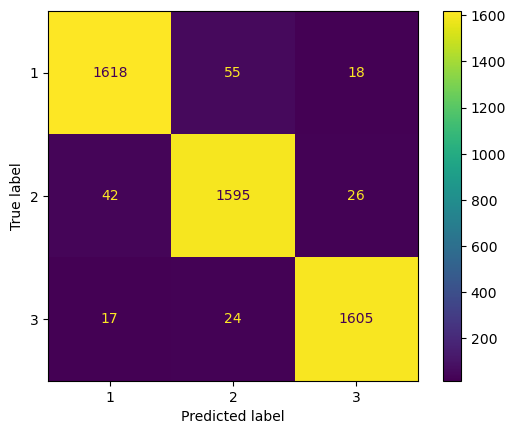

In [53]:
#Drawing Confusion Metric
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_ab,ypred_test_AB)
ConfusionMatrixDisplay(cm,display_labels=df["Stage"].unique()).plot()
plt.show()